# Adding from fields

In [ ]:
#@title Example form fields
#@markdown Forms support many types of fields.

no_type_checking = 'v'  #@param
string_type = 'example'  #@param {type: "string"}
slider_value = 142  #@param {type: "slider", min: 100, max: 200}
number = 102  #@param {type: "number"}
date = '2010-11-05'  #@param {type: "date"}
pick_me = "thursday"  #@param ['monday', 'tuesday', 'wednesday', 'thursday']
select_or_input = "oranges" #@param ["apples", "bananas", "oranges"] {allow-input: true}
#@markdown ---


In [ ]:
slider_value

142

# Camera Capture

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


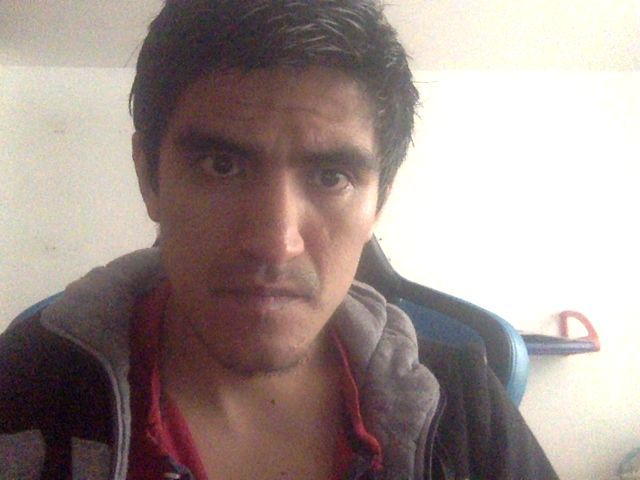

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
filename

'photo.jpg'

# Cross-output communication

In [ ]:
%%javascript
const listenerChannel = new BroadcastChannel('channel');
listenerChannel.onmessage = (msg) => {
  const div = document.createElement('div');
  div.textContent = msg.data;
  document.body.appendChild(div);
};

<IPython.core.display.Javascript object>

In [ ]:
%%javascript
const senderChannel = new BroadcastChannel('channel');
senderChannel.postMessage('Hello world!');

<IPython.core.display.Javascript object>

# display.Javascript

In [ ]:
import IPython
js_code = '''
document.querySelector("#output-area").appendChild(document.createTextNode("hello world!"));
'''
display(IPython.display.Javascript(js_code))

<IPython.core.display.Javascript object>

# Downloading files

In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = 'REPLACE_WITH_YOUR_FILE_ID'
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [ ]:
!gdown --id {"#@!"} -O name.h5

# Download to local file system

In [ ]:
from google.colab import files

with open('example.txt', 'w') as f:
  f.write('some content')

files.download('example.txt')

# Evaluate JS expressions

In [ ]:
import IPython
from google.colab import output

display(IPython.display.Javascript('''
  window.someValue = new Promise(resolve => {
    setTimeout(() => {
      resolve("hello world!");
    }, 100);
  });
'''))


value = output.eval_js('someValue');
value

<IPython.core.display.Javascript object>

'hello world!'

# Hiding code

In [ ]:
#@title Give me a name {display-mode: "form"}

# This code will be hidden when the notebook is loaded.
a,b=7,6

# Importing library that is not in Colab

In [ ]:
!pip install -q matplotlib-venn

In [ ]:
!apt-get -qq install -y libfluidsynth1

Selecting previously unselected package libfluidsynth1:amd64.
(Reading database ... 131183 files and directories currently installed.)
Preparing to unpack .../libfluidsynth1_1.1.9-1_amd64.deb ...
Unpacking libfluidsynth1:amd64 (1.1.9-1) ...
Processing triggers for libc-bin (2.27-3ubuntu1) ...
Setting up libfluidsynth1:amd64 (1.1.9-1) ...
Processing triggers for libc-bin (2.27-3ubuntu1) ...


# Import data from Google sheets

In [ ]:
!pip install --upgrade -q gspread

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

worksheet = gc.open('Fudi Weekly time sheet').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(rows)
rows = rows[14:-4]
print(rows)

# Convert to a DataFrame and render.
import pandas as pd
df =pd.DataFrame.from_records(rows,index=1).drop([0],axis=1)
df.index.name= "Project Name"
df.columns = df.iloc[0]
df = df.iloc[1:,:-1]
df = df.apply(lambda x: pd.to_numeric(x, errors='ignore')).fillna(0)
df['Totals'] = df.apply(lambda x : x.sum(),axis=1)
df.loc['Total hrs'] = df.sum()
df

[['', '', '', '', '', '', '', ''], ['', '', '', '', '', '', '', ''], ['', 'Your Company', '', '', '', '', '', ''], ['', '123 Your Street', '', '', '', '', '', ''], ['', 'Your City, ST 12345', '', '', '', '', '', ''], ['', '(123) 456-7890', '', '', '', '', '', ''], ['', '', '', '', '', '', '', ''], ['', 'Time Sheet', '', '', '', '', '', ''], ['', '', '', '', '', '', '', ''], ['', 'Name', '', 'Timeframe', '', '', 'Submitted on', ''], ['', 'Employee name', '', 'Week of 9/4/2000 - 9/8/2000', '', '', '9/8/2000', ''], ['', '', '', '', '', '', '', ''], ['', '', '', '', '', '', '', ''], ['', '', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', ''], ['', '', 'Sep 4', 'Sep 5', 'Sep 6', 'Sep 7', 'Sep 8', 'Totals'], ['', 'Project A', '1.00', '2.50', '2.00', '', '1.00', '6.50'], ['', 'Project B', '', '2.50', '', '5.00', '2.00', '9.50'], ['', 'Project C', '6.00', '3.00', '3.50', '0.50', '5.00', '18.00'], ['', 'Project D', '1.00', '', '4.00', '', '', '5.00'], ['', '', '', '', '', '', '', ''], ['', 'Total hrs', '8.

,Sep 4,Sep 5,Sep 6,Sep 7,Sep 8,Totals
Project Name,,,,,,
Project A,1.0,2.5,2.0,0.0,1.0,6.5
Project B,0.0,2.5,0.0,5.0,2.0,9.5
Project C,6.0,3.0,3.5,0.5,5.0,18.0
Project D,1.0,0.0,4.0,0.0,0.0,5.0
Total hrs,8.0,8.0,9.5,5.5,8.0,39.0


# Install Cartopy

In [ ]:
%matplotlib inline

/usr/lib/python3/dist-packages/cartopy/io/__init__.py:264: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_ocean.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/lib/python3/dist-packages/cartopy/io/__init__.py:264: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/lib/python3/dist-packages/cartopy/io/__init__.py:264: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/lib/python3/dist-packages/cartopy/io/__init__.py:264: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_lakes.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/lib/python3/dist-packages/cartopy/io/__init__.py:264: DownloadWarning: Downloading: http://nacisc

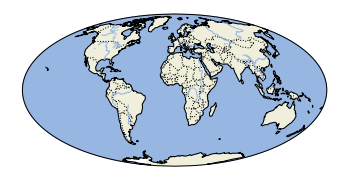

In [ ]:
!apt-get -qq install python-cartopy python3-cartopy
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.Mollweide())
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)
plt.show()

# 7 zip

In [ ]:
# https://pypi.python.org/pypi/libarchive
# !apt-get -qq install -y libarchive-dev && pip install -q -U libarchive
import libarchive

# # def create_7z():
# for entry in libarchive.public.create_file(
#                 'create.7z',
#                 libarchive.constants.ARCHIVE_FORMAT_7ZIP, 
#                 ['content/example.txt']):
#     print("Adding: %s" % (entry))

# # def test_create_to_file_from_file():
# for entry in libarchive.public.create_file(
#                 'create.7z',
#                 libarchive.constants.ARCHIVE_FORMAT_7ZIP, 
#                 ['/etc/hosts']):
#     pass

# GraphViz & PyDot

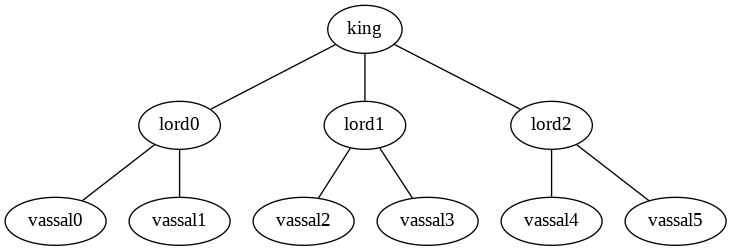

In [ ]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot

graph = pydot.Dot(graph_type='graph')

for i in range(3):
    edge = pydot.Edge("king", "lord%d" % i)
    graph.add_edge(edge)

vassal_num = 0
for i in range(3):
    for j in range(2):
        edge = pydot.Edge("lord%d" % i, "vassal%d" % vassal_num)
        graph.add_edge(edge)
        vassal_num += 1

graph.write_png('example1_graph.png')
from IPython.display import display
from PIL import Image
display(Image.open('example1_graph.png'))

# Javascript to Python and viceversa

In [ ]:
import IPython
from google.colab import output

def Concat(a, b):
  # Use display.JSON to transfer a structured result.
  return IPython.display.JSON({'result': ' '.join((a, b))})

output.register_callback('notebook.Concat', Concat)

In [ ]:
%%javascript
(async function() {
  const result = await google.colab.kernel.invokeFunction(
    'notebook.Concat', // The callback name.
    ['hello', 'world!'], // The arguments.
    {}); // kwargs
  const text = result.data['application/json'];
  document.querySelector("#output-area").appendChild(document.createTextNode(text.result));
})();

<IPython.core.display.Javascript object>

In [ ]:
import IPython
from google.colab import output

display(IPython.display.HTML('''
    The items:
    <br><ol id="items"></ol>
    <button id='button'>Click to add</button>
    <script>
      document.querySelector('#button').onclick = () => {
        google.colab.kernel.invokeFunction('notebook.AddListItem', [], {});
      };
    </script>
    '''))

def add_list_item():
  # Use redirect_to_element to direct the elements which are being written.
  with output.redirect_to_element('#items'):
    # Use display to add items which will be persisted on notebook reload.
    display(IPython.display.HTML('<li> Another item</li>'))

output.register_callback('notebook.AddListItem', add_list_item)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import IPython
import uuid
from google.colab import output

class InvokeButton(object):
  def __init__(self, title, callback):
    self._title = title
    self._callback = callback

  def _repr_html_(self):
    callback_id = 'button-' + str(uuid.uuid4())
    output.register_callback(callback_id, self._callback)

    template = """<button id="{callback_id}">{title}</button>
        <script>
          document.querySelector("#{callback_id}").onclick = (e) => {{
            google.colab.kernel.invokeFunction('{callback_id}', [], {{}})
            e.preventDefault();
          }};
        </script>"""
    html = template.format(title=self._title, callback_id=callback_id)
    return html

def do_something():
  print('here')

InvokeButton('click me', do_something)

here
here


# List files from GDrive

In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

# Regular expresion
# https://developers.google.com/drive/v2/web/search-parameters
listed = drive.ListFile({'q': "title contains '.json' and 'root' in parents"}).GetList()
for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))

title export_all_tag_profiles.json, id 1BJhONx1K7sQQqb6qzNj_eLNAlZbNKgjM


# GDrive in your VM

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

In [ ]:
with open('/gdrive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat '/gdrive/My Drive/foo.txt'

# Files from GCloud

In [ ]:
from google.colab import auth
auth.authenticate_user()

# https://cloud.google.com/resource-manager/docs/creating-managing-projects
project_id = 'datastudio-214816'
!gcloud config set project {project_id}

Updated property [core/project].


To take a quick anonymous survey, run:
  $ gcloud alpha survey



In [ ]:
# Download the file from a given Google Cloud Storage bucket.
!gsutil cp gs://{bucket_name}/file_to_download.txt /tmp/gsutil_download.txt
  
# Print the result to make sure the transfer worked.
!cat /tmp/gsutil_download.txt

# Files GCloud & Cloud Storage

In [ ]:
# Authenticate to GCS.
from google.colab import auth
auth.authenticate_user()

# https://cloud.google.com/resource-manager/docs/creating-managing-projects
project_id = '[your Cloud Platform project ID]'

# Create the service client.
from googleapiclient.discovery import build
gcs_service = build('storage', 'v1')

from apiclient.http import MediaIoBaseDownload

with open('/tmp/gsutil_download.txt', 'wb') as f:
  # Download the file from a given Google Cloud Storage bucket.
  request = gcs_service.objects().get_media(bucket=bucket_name,
                                            object='to_upload.txt')
  media = MediaIoBaseDownload(f, request)

  done = False
  while not done:
    # _ is a placeholder for a progress object that we ignore.
    # (Our file is small, so we skip reporting progress.)
    _, done = media.next_chunk()

print('Download complete')

In [ ]:
# Inspect the file we downloaded to /tmp
!cat /tmp/downloaded_from_gcs.txt

# Files Github

In [ ]:
# Clone the entire repo.
!git clone -l -s git://github.com/jakevdp/PythonDataScienceHandbook.git cloned-repo
%cd cloned-repo
!ls

In [ ]:
# Fetch a single <1MB file using the raw GitHub URL.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://api.github.com/repos/jakevdp/PythonDataScienceHandbook/contents/notebooks/data/california_cities.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 59658  100 59658    0     0   258k      0 --:--:-- --:--:-- --:--:--  258k


# Upload local file system

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving example.txt to example (1).txt
User uploaded file "example.txt" with length 12 bytes


# *italicized text*

# Pandas iterative

In [ ]:
%load_ext google.colab.data_table
# %unload_ext google.colab.data_table

from vega_datasets import data
data.cars()

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01
5,10.0,8,429.0,198.0,15.0,ford galaxie 500,USA,4341,1970-01-01
6,9.0,8,454.0,220.0,14.0,chevrolet impala,USA,4354,1970-01-01
7,8.5,8,440.0,215.0,14.0,plymouth fury iii,USA,4312,1970-01-01
8,10.0,8,455.0,225.0,14.0,pontiac catalina,USA,4425,1970-01-01
9,8.5,8,390.0,190.0,15.0,amc ambassador dpl,USA,3850,1970-01-01


# Sympy Num Annotation

In [ ]:
from IPython.display import Math, HTML

def load_mathjax_in_cell_output():
  display(HTML("<script src='https://www.gstatic.com/external_hosted/"
               "mathjax/latest/MathJax.js?config=default'></script>"))
get_ipython().events.register('pre_run_cell', load_mathjax_in_cell_output)

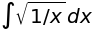

In [ ]:
# try it out:
import sympy
sympy.init_printing()
x = sympy.symbols('x')
sympy.Integral(sympy.sqrt(1 / x), x)

# Server inner

In [ ]:
%%html
<link rel="stylesheet" href="/nbextensions/google.colab/tabbar.css">
<div class='goog-tab'>
  Some content
</div>

In [ ]:
import portpicker
import threading
import socket
import IPython

from six.moves import socketserver
from six.moves import SimpleHTTPServer

class V6Server(socketserver.TCPServer):
  address_family = socket.AF_INET6

class Handler(SimpleHTTPServer.SimpleHTTPRequestHandler):
  def do_GET(self):
    self.send_response(200)
    # If the response should not be cached in the notebook for
    # offline access:
    # self.send_header('x-colab-notebook-cache-control', 'no-cache')
    self.end_headers()
    self.wfile.write(b'''
      document.querySelector('#output-area').appendChild(document.createTextNode('Script result!'));
    ''')

port = portpicker.pick_unused_port()

def server_entry():
    httpd = V6Server(('::', port), Handler)
    # Handle a single request then exit the thread.
    httpd.serve_forever()

thread = threading.Thread(target=server_entry)
thread.start()

# Display some HTML referencing the resource.
display(IPython.display.HTML('<script src="https://localhost:{port}/"></script>'.format(port=port)))

# CV2 Images

In [ ]:
from google.colab.patches import cv2_imshow

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5500  100  5500    0     0   233k      0 --:--:-- --:--:-- --:--:--  233k


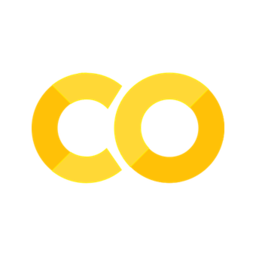

In [ ]:
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
img = cv2.imread('logo.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

# Handler output print in process 

In [ ]:
import time
import sys
from google.colab import output

print('Starting.')

with output.use_tags('some_outputs'):
  sys.stdout.write('working....\n')
  sys.stdout.flush();
  time.sleep(2)

  sys.stdout.write('still working...\n')
  sys.stdout.flush();
  time.sleep(2)

# Now clear the previous outputs.
output.clear(output_tags='some_outputs')
print('All done!')


Starting.
All done!


# TensorFlow

In [ ]:
# # To determine which version you're using:
# !pip show tensorflow

# # For the current version: 
# !pip install --upgrade tensorflow

# # For a specific version:
# !pip install tensorflow==1.2

# # For the latest nightly build:
# !pip install tf-nightly

# BigQuery Cloud

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
from google.cloud import bigquery

# https://cloud.google.com/resource-manager/docs/creating-managing-projects
project_id =  'datastudio-214816'
client = bigquery.Client(project=project_id)

for dataset in client.list_datasets():
  print(dataset.dataset_id)

# BigQuery Pandas

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
import pandas as pd

# https://cloud.google.com/resource-manager/docs/creating-managing-projects
project_id =  'datastudio-214816'
sample_count = 2000
row_count = pd.io.gbq.read_gbq('''
  SELECT 
    COUNT(*) as total
  FROM [bigquery-public-data:samples.gsod]''', project_id=project_id, verbose=False).total[0]
df = pd.io.gbq.read_gbq('''
  SELECT
    *
  FROM
    [bigquery-public-data:samples.gsod]
  WHERE RAND() < %d/%d
''' % (sample_count, row_count), project_id=project_id, verbose=False)
print('Full dataset has %d rows' % row_count)

In [ ]:
df.describe()

# Bar Plot

In [ ]:
print(type(cars))
# plot the dataset, referencing dataframe column names
import altair as alt
alt.Chart(cars).mark_bar().encode(
  x='mean(Miles_per_Gallon)',
  y='Origin',
  color='Origin'
)

<class 'pandas.core.frame.DataFrame'>


alt.Chart(...)

# Histogram

In [ ]:
# plot the dataset, referencing dataframe column names
import altair as alt
alt.Chart(cars).mark_bar().encode(
  x=alt.X('Miles_per_Gallon', bin=True),
  y='count()',
)

alt.Chart(...)

# Scatter Static Plot

In [ ]:
import altair as alt

interval = alt.selection_interval()

alt.Chart(cars).mark_point().encode(
  x='Horsepower',
  y='Miles_per_Gallon',
  color=alt.condition(interval, 'Origin', alt.value('lightgray'))
).properties(
  selection=interval
)

alt.Chart(...)

# Scatter Interactive Plot

In [ ]:
# plot the dataset, referencing dataframe column names
import altair as alt
alt.Chart(cars).mark_point().encode(
  x='Horsepower',
  y='Miles_per_Gallon',
  color='Origin'
).interactive()

alt.Chart(...)

# Linked Static Plot

In [ ]:
import altair as alt

interval = alt.selection_interval()

base = alt.Chart(cars).mark_point().encode(
  y='Miles_per_Gallon',
  color=alt.condition(interval, 'Origin', alt.value('lightgray'))
).properties(
  selection=interval
)

base.encode(x='Acceleration') | base.encode(x='Horsepower')

alt.HConcatChart(...)

# Link Scatter Histogram Plot

In [ ]:
import altair as alt

interval = alt.selection_interval()

points = alt.Chart(cars).mark_point().encode(
  x='Horsepower',
  y='Miles_per_Gallon',
  color=alt.condition(interval, 'Origin', alt.value('lightgray'))
).properties(
  selection=interval
)

histogram = alt.Chart(cars).mark_bar().encode(
  x='count()',
  y='Origin',
  color='Origin'
).transform_filter(interval)

points & histogram

alt.VConcatChart(...)

# Scatter plot Rolling Mean

In [ ]:
# load an example dataset
from vega_datasets import data
cars = data.cars()

import altair as alt

points = alt.Chart(cars).mark_point().encode(
  x='Year:T',
  y='Miles_per_Gallon',
  color='Origin'
).properties(
  width=800
)

lines = alt.Chart(cars).mark_line().encode(
  x='Year:T',
  y='mean(Miles_per_Gallon)',
  color='Origin'
).properties(
  width=800
).interactive(bind_y=False)
              
points + lines

alt.LayerChart(...)

# Stacked Histogram

In [ ]:
# plot the dataset, referencing dataframe column names
import altair as alt
alt.Chart(cars).mark_bar().encode(
  x=alt.X('Miles_per_Gallon', bin=True),
  y='count()',
  color='Origin'
)

alt.Chart(...)

# Time Series

In [ ]:
from vega_datasets import data
stocks = data.stocks()

import altair as alt
alt.Chart(stocks).mark_line().encode(
  x='date:T',
  y='price',
  color='symbol'
).interactive(bind_y=False)

alt.Chart(...)

# Flask & NGROK

In [ ]:
!pip install -q flask-ngrok
!pip install -q flask_restful

In [ ]:
from google.colab import output 
output.serve_kernel_port_as_iframe(5000)
# output.serve_kernel_port_as_window(5000)
# run them in different cell
from flask_ngrok import run_with_ngrok
from flask import Flask
app = Flask(__name__)
run_with_ngrok(app)   #starts ngrok when the app is run
@app.route("/")
def home():
    return "<h1>Running Flask on Google Colab!</h1><br><h2>Data Stage</h2><br><h2>Data Engineers</h2>"
  
app.run()

<IPython.core.display.Javascript object>

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [02/Jan/2022 19:15:07] "GET / HTTP/1.1" 200 -


 * Running on http://2b4a-35-190-188-36.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


In [ ]:
output.serve_kernel_port_as_window(5000)

<IPython.core.display.Javascript object>

In [ ]:
%%writefile app.py
from flask import Flask
from flask_restful import reqparse, abort, Api, Resource

from flask_ngrok import run_with_ngrok
from flask import Flask
app = Flask(__name__)
api = Api(app)
run_with_ngrok(app)   #starts ngrok when the app is run

TODOS = {
    'todo1': {'task': 'build an API'},
    'todo2': {'task': '?????'},
    'todo3': {'task': 'profit!'},
}


def abort_if_todo_doesnt_exist(todo_id):
    """Abort request if todo_id does not exist in TODOS"""
    if todo_id not in TODOS:
        abort(404, message="Todo {} doesn't exist".format(todo_id))


# argument parsing
parser = reqparse.RequestParser()
parser.add_argument('task')


# Todo
# shows a single todo item and lets you updatae or delete a todo item
class Todo(Resource):
    def get(self, todo_id):
        """Return the specified todo item given the todo_id
        Example:
            # In the terminal
            $ curl http://localhost:5000/todos/todo1
            OR
            # Python
            requests.get('http://localhost:5000/todos/todo1').json()
        """
        abort_if_todo_doesnt_exist(todo_id)
        return TODOS[todo_id]

    def delete(self, todo_id):
        """Deletes an existing task
        Example:
            # In the terminal
            $ curl http://localhost:5000/todos/todo1 -X DELETE -v
            OR
            # Python
            requests.delete('http://localhost:5000/todos/todo4')
        """
        abort_if_todo_doesnt_exist(todo_id)
        del TODOS[todo_id]
        # 204: SUCCESS; NO FURTHER CONTENT
        return '', 204

    def put(self, todo_id):
        """Updates existing task
        Example:
            # In the terminal
            $ curl http://localhost:5000/todos/todo1 -d "task=Remember the milk" -X PUT -v
            OR
            # Python
            requests.put('http://localhost:5000/todos/todo1',
                         data={'task': 'Remember the milk'}).json()
        """

        # parser
        abort_if_todo_doesnt_exist(todo_id)
        args = parser.parse_args()
        task = {'task': args['task']}
        TODOS[todo_id] = task
        # 201: CREATED
        return task, 201


# TodoList
# shows a list of all todos, and lets you POST to add new tasks
class TodoList(Resource):
    def get(self):
        """Return the current TODO dictionary
        Example:
            # In the terminal
            $ curl http://localhost:5000/todos
            OR
            # Python
            requests.get('http://localhost:5000/todos').json()
        """
        return TODOS

    def post(self):
        """Adds task to TODO
        Example:
            # In the terminal
            $ curl http://localhost:5000/todos -d "task=Remember the milk" -X POST -v
            OR
            # Python
            requests.post('http://localhost:5000/todos',
                         data={'task': 'Remember the milk'}).json()
        """
        args = parser.parse_args()
        todo_id = int(max(TODOS.keys()).lstrip('todo')) + 1
        todo_id = 'todo%i' % todo_id
        TODOS[todo_id] = {'task': args['task']}
        # 201: CREATED
        return TODOS[todo_id], 201

@app.route("/")
def home():
    return "<h1>Running Flask on Google Colab!</h1>"
    
# Setup the Api resource routing here
# Route the URL to the resource
api.add_resource(TodoList, '/todos')
api.add_resource(Todo, '/todos/<todo_id>')

if __name__ == '__main__':
    app.run()

Overwriting app.py


In [ ]:
!python app.py & npx localtunnel --port 5000 --subdomain romellfudi

 * Serving Flask app "app" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
 * Running on http://f69b-35-190-188-36.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040
npx: installed 22 in 3.593s
your url is: https://romellfudi.loca.lt
127.0.0.1 - - [02/Jan/2022 19:19:48] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [02/Jan/2022 19:19:49] "GET /favicon.ico HTTP/1.1" 404 -
